# Statistics



## Introduction to statistical data analysis



[Matlab post](http://matlab.cheme.cmu.edu/2011/08/27/introduction-to-statistical-data-analysis/)

Given several measurements of a single quantity, determine the average value of the measurements, the standard deviation of the measurements and the 95% confidence interval for the average.



In [34]:
import numpy as np

y = [8.1, 8.0, 8.1]

ybar = np.mean(y)
s = np.std(y, ddof=1)

print(ybar, s)

8.066666666666668 0.05773502691896237


Interesting, we have to specify the divisor in numpy.std by the ddof argument. The default for this in Matlab is 1, the default for this function is 0.

Here is the principle of computing a confidence interval.

1.  Compute the average
2.  Compute the standard deviation of your data
3.  Define the confidence interval, e.g. 95% = 0.95
4.  Compute the student-t multiplier. This is a function of the confidence
    interval you specify, and the number of data points you have minus 1. You
    subtract 1 because one degree of freedom is lost from calculating the
    average.

The confidence interval is defined as ybar ± T\_multiplier\*std/sqrt(n).



In [35]:
from scipy.stats.distributions import  t
ci = 0.95
alpha = 1.0 - ci

n = len(y)
T_multiplier = t.ppf(1.0 - alpha / 2.0, n - 1)

ci95 = T_multiplier * s / np.sqrt(n)

print('T_multiplier = {0}'.format(T_multiplier))
print('ci95 = {0}'.format(ci95))
print('The true average is between {0} and {1} at a 95% confidence level'.format(ybar - ci95, ybar + ci95))

T_multiplier = 4.302652729911275
ci95 = 0.14342175766370865
The true average is between 7.9232449090029595 and 8.210088424330376 at a 95% confidence level


## Basic statistics



Given several measurements of a single quantity, determine the average value of the measurements, the standard deviation of the measurements and the 95% confidence interval for the average.

This is a recipe for computing the confidence interval. The strategy is:

1.  compute the average
2.  Compute the standard deviation of your data
3.  Define the confidence interval, e.g. 95% = 0.95
4.  compute the student-t multiplier. This is a function of the confidence

interval you specify, and the number of data points you have minus 1. You
subtract 1 because one degree of freedom is lost from calculating the
average. The confidence interval is defined as
ybar +- T\_multiplier\*std/sqrt(n).





In [36]:
import numpy as np
from scipy.stats.distributions import  t
    
y = [8.1, 8.0, 8.1]
    
ybar = np.mean(y)
s = np.std(y)
    
ci = 0.95
alpha = 1.0 - ci
    
n = len(y)
T_multiplier = t.ppf(1-alpha/2.0, n-1)
    
ci95 = T_multiplier * s / np.sqrt(n-1)
    
print([ybar - ci95, ybar + ci95])

[7.9232449090029595, 8.210088424330376]


## Confidence interval on an average



scipy has a statistical package available for getting statistical distributions. This is useful for computing confidence intervals using the student-t tables. Here is an example of computing a 95% confidence interval on an average.



In [37]:
import numpy as np
from scipy.stats.distributions import  t

n = 10 # number of measurements
dof = n - 1 # degrees of freedom
avg_x = 16.1 # average measurement
std_x = 0.01 # standard deviation of measurements

# Find 95% prediction interval for next measurement

alpha = 1.0 - 0.95

pred_interval = t.ppf(1-alpha/2.0, dof) * std_x / np.sqrt(n)

s = ['We are 95% confident the next measurement',
       ' will be between {0:1.3f} and {1:1.3f}']
print(''.join(s).format(avg_x - pred_interval, avg_x + pred_interval))

We are 95% confident the next measurement will be between 16.093 and 16.107


## Are averages different



[Matlab post](http://matlab.cheme.cmu.edu/2012/01/28/are-two-averages-different/)

Adapted from [http://stattrek.com/ap-statistics-4/unpaired-means.aspx](http://stattrek.com/ap-statistics-4/unpaired-means.aspx)

Class A had 30 students who received an average test score of 78, with standard deviation of 10. Class B had 25 students an average test score of 85, with a standard deviation of 15. We want to know if the difference in these averages is statistically relevant. Note that we only have estimates of the true average and standard deviation for each class, and there is uncertainty in those estimates. As a result, we are unsure if the averages are really different. It could have just been luck that a few students in class B did better.



### The hypothesis



the true averages are the same. We need to perform a two-sample t-test of the hypothesis that $\mu_1 - \mu_2 = 0$ (this is often called the null hypothesis). we use a two-tailed test because we do not care if the difference is positive or negative, either way means the averages are not the same.



In [38]:
import numpy as np

n1 = 30  # students in class A
x1 = 78.0  # average grade in class A
s1 = 10.0  # std dev of exam grade in class A

n2 = 25  # students in class B
x2 = 85.0  # average grade in class B
s2 = 15.0  # std dev of exam grade in class B

# the standard error of the difference between the two averages.
SE = np.sqrt(s1**2 / n1 + s2**2 / n2)

# compute DOF
DF = (n1 - 1) + (n2 - 1)

See the discussion at [http://stattrek.com/Help/Glossary.aspx?Target=Two-sample%20t-test>](http://stattrek.com/Help/Glossary.aspx?Target=Two-sample%20t-test>)for a more complex definition of degrees of freedom. Here we simply subtract one from each sample size to account for the estimation of the average of each sample.



### Compute the t-score for our data



The difference between two averages determined from small sample numbers follows the t-distribution. the t-score is the difference between the difference of the means and the hypothesized difference of the means, normalized by the standard error. we compute the absolute value of the t-score to make sure it is positive for convenience later.



In [39]:
tscore = np.abs(((x1 - x2) - 0) / SE)
print(tscore)

1.9932317910802477


### Interpretation



A way to approach determining if the difference is significant or not is to ask, does our computed average fall within a confidence range of the hypothesized value (zero)? If it does, then we can attribute the difference to statistical variations at that confidence level. If it does not, we can say that statistical variations do not account for the difference at that confidence level, and hence the averages must be different.

Let us compute the t-value that corresponds to a 95% confidence level for a mean of zero with the degrees of freedom computed earlier. This means that 95% of the t-scores we expect to get will fall within ± t95.



In [40]:
from scipy.stats.distributions import  t

ci = 0.95;
alpha = 1 - ci;
t95 = t.ppf(1.0 - alpha/2.0, DF)

print(t95)

2.0057459935369497


since tscore < t95, we conclude that at the 95% confidence level we cannot say these averages are statistically different because our computed t-score falls in the expected range of deviations. Note that our t-score is very close to the 95% limit. Let us consider a smaller confidence interval.



In [41]:
ci = 0.94
alpha = 1 - ci;
t95 = t.ppf(1.0 - alpha/2.0, DF)

print(t95)

1.9219136418080454


at the 94% confidence level, however, tscore > t94, which means we can say with 94% confidence that the two averages are different; class B performed better than class A did. Alternatively, there is only about a 6% chance we are wrong about that statement.
another way to get there

An alternative way to get the confidence that the averages are different is to directly compute it from the cumulative t-distribution function. We compute the difference between all the t-values less than tscore and the t-values less than -tscore, which is the fraction of measurements that are between them. You can see here that we are practically 95% sure that the averages are different.



In [42]:
f = t.cdf(tscore, DF) - t.cdf(-tscore, DF)
print(f)

0.9486050757322071


## Model selection



[Matlab post](http://matlab.cheme.cmu.edu/2011/10/01/model-selection/)

adapted from [http://www.itl.nist.gov/div898/handbook/pmd/section4/pmd44.htm](http://www.itl.nist.gov/div898/handbook/pmd/section4/pmd44.htm)

In this example, we show some ways to choose which of several models fit data the best. We have data for the total pressure and temperature of a fixed amount of a gas in a tank that was measured over the course of several days. We want to select a model that relates the pressure to the gas temperature.

The data is stored in a text file download PT.txt , with the following structure:

    Run          Ambient                            Fitted
     Order  Day  Temperature  Temperature  Pressure    Value    Residual
      1      1      23.820      54.749      225.066   222.920     2.146
    ...

We need to read the data in, and perform a regression analysis on P vs. T. In python we start counting at 0, so we actually want columns 3 and 4.



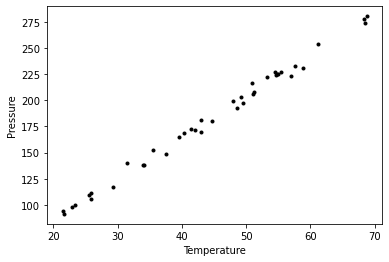

In [43]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('data/PT.txt', skiprows=2)
T = data[:, 3]
P = data[:, 4]

plt.plot(T, P, 'k.')
plt.xlabel('Temperature')
plt.ylabel('Pressure');

It appears the data is roughly linear, and we know from the ideal gas law that PV = nRT, or P = nR/V\*T, which says P should be linearly correlated with V. Note that the temperature data is in degC, not in K, so it is not expected that P=0 at T = 0. We will use linear algebra to compute the line coefficients.



In [44]:
A = np.vstack([T**0, T]).T
b = P

x, res, rank, s = np.linalg.lstsq(A, b, rcond=None)
intercept, slope = x
print('b, m =', intercept, slope)

n = len(b)
k = len(x)

sigma2 = np.sum((b - np.dot(A,x))**2) / (n - k)

C = sigma2 * np.linalg.inv(np.dot(A.T, A))
se = np.sqrt(np.diag(C))

from scipy.stats.distributions import  t
alpha = 0.05

sT = t.ppf(1-alpha/2., n - k) # student T multiplier
CI = sT * se

print('CI = ',CI)
for beta, ci in zip(x, CI):
    print('[{0} {1}]'.format(beta - ci, beta + ci))

b, m = 7.748997392381611 3.9301404382402634
CI =  [4.76511545 0.1026405 ]
[2.983881946376319 12.514112838386904]
[3.827499940788548 4.032780935691979]


The confidence interval on the intercept is large, but it does not contain zero at the 95% confidence level.

The R^2 value accounts roughly for the fraction of variation in the data that can be described by the model. Hence, a value close to one means nearly all the variations are described by the model, except for random variations.



In [45]:
ybar = np.mean(P)
SStot = np.sum((P - ybar)**2)
SSerr = np.sum((P - np.dot(A, x))**2)
R2 = 1 - SSerr/SStot
print(R2)

0.9937154117977646


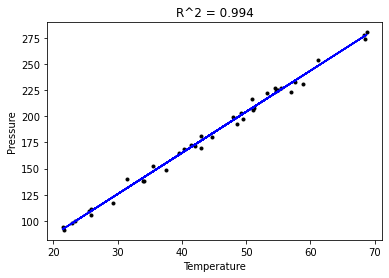

In [46]:
plt.figure(); plt.clf()
plt.plot(T, P, 'k.', T, np.dot(A, x), 'b-')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.title('R^2 = {0:1.3f}'.format(R2));

The fit looks good, and R^2 is near one, but is it a good model? There are a few ways to examine this. We want to make sure that there are no systematic trends in the errors between the fit and the data, and we want to make sure there are not hidden correlations with other variables. The residuals are the error between the fit and the data. The residuals should not show any patterns when plotted against any variables, and they do not in this case.



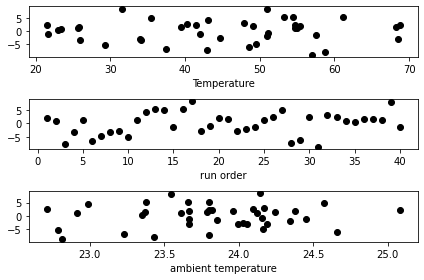

In [47]:
residuals = P - np.dot(A, x)

f, (ax1, ax2, ax3) = plt.subplots(3)

ax1.plot(T,residuals,'ko')
ax1.set_xlabel('Temperature')

run_order = data[:, 0]
ax2.plot(run_order, residuals,'ko ')
ax2.set_xlabel('run order')

ambientT = data[:, 2]
ax3.plot(ambientT, residuals,'ko')
ax3.set_xlabel('ambient temperature')

plt.tight_layout(); # make sure plots do not overlap

There may be some correlations in the residuals with the run order. That could indicate an experimental source of error.

We assume all the errors are uncorrelated with each other. We can use a lag plot to assess this, where we plot residual[i] vs residual[i-1], i.e. we look for correlations between adjacent residuals. This plot should look random, with no correlations if the model is good.



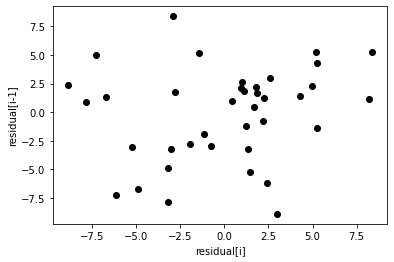

In [48]:
plt.figure(); plt.clf()
plt.plot(residuals[1:-1], residuals[0:-2],'ko')
plt.xlabel('residual[i]')
plt.ylabel('residual[i-1]');

It is hard to argue there is any correlation here.

Lets consider a quadratic model instead.



In [49]:
A = np.vstack([T**0, T, T**2]).T
b = P;

x, res, rank, s = np.linalg.lstsq(A, b, rcond=None)
print(x)

n = len(b)
k = len(x)

sigma2 = np.sum((b - np.dot(A,x))**2) / (n - k)

C = sigma2 * np.linalg.inv(np.dot(A.T, A))
se = np.sqrt(np.diag(C))

from scipy.stats.distributions import  t
alpha = 0.05

sT = t.ppf(1-alpha/2., n - k) # student T multiplier
CI = sT * se

print('CI = ',CI)
for beta, ci in zip(x, CI):
    print('[{0} {1}]'.format(beta - ci, beta + ci))


ybar = np.mean(P)
SStot = np.sum((P - ybar)**2)
SSerr = np.sum((P - np.dot(A,x))**2)
R2 = 1 - SSerr/SStot
print('R^2 = {0}'.format(R2))

[9.00353031e+00 3.86669879e+00 7.26244301e-04]
CI =  [1.38030344e+01 6.62100654e-01 7.48516727e-03]
[-4.799504121230253 22.806564732890642]
[3.204598136807082 4.528799444091202]
[-0.006758922969064296 0.008211411570350402]
R^2 = 0.9937219694072356


You can see that the confidence interval on the constant and T^2 term includes zero. That is a good indication this additional parameter is not significant. You can see also that the R^2 value is not better than the one from a linear fit,  so adding a parameter does not increase the goodness of fit. This is an example of overfitting the data. Since the constant in this model is apparently not significant, let us consider the simplest model with a fixed intercept of zero.

Let us consider a model with intercept = 0, P = alpha\*T.



[4.056801244949384 4.123083498991817]


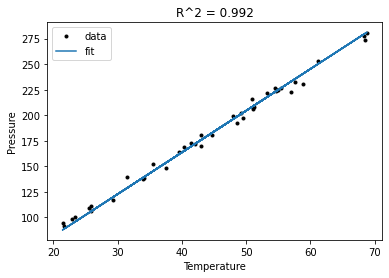

In [50]:
A = np.vstack([T]).T
b = P;

x, res, rank, s = np.linalg.lstsq(A, b, rcond=None)

n = len(b)
k = len(x)

sigma2 = np.sum((b - np.dot(A,x))**2) / (n - k)

C = sigma2 * np.linalg.inv(np.dot(A.T, A))
se = np.sqrt(np.diag(C))

from scipy.stats.distributions import  t
alpha = 0.05

sT = t.ppf(1-alpha/2.0, n - k) # student T multiplier
CI = sT * se

for beta, ci in zip(x, CI):
    print('[{0} {1}]'.format(beta - ci, beta + ci))

plt.figure()
plt.plot(T, P, 'k. ', T, np.dot(A, x))
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend(['data', 'fit'])

ybar = np.mean(P)
SStot = np.sum((P - ybar)**2)
SSerr = np.sum((P - np.dot(A,x))**2)
R2 = 1 - SSerr/SStot
plt.title('R^2 = {0:1.3f}'.format(R2));

The fit is visually still pretty good, and the R^2 value is only slightly worse. Let us examine the residuals again.



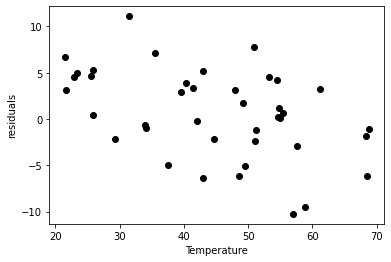

In [51]:
residuals = P - np.dot(A,x)

plt.figure()
plt.plot(T,residuals,'ko')
plt.xlabel('Temperature')
plt.ylabel('residuals');

You can see a slight trend of decreasing value of the residuals as the Temperature increases. This may indicate a deficiency in the model with no intercept. For the ideal gas law in degC: $PV = nR(T+273)$ or $P = nR/V*T + 273*nR/V$, so the intercept is expected to be non-zero in this case. Specifically, we expect the intercept to be 273\*R\*n/V. Since the molar density of a gas is pretty small, the intercept may be close to, but not equal to zero. That is why the fit still looks ok, but is not as good as letting the intercept be a fitting parameter. That is an example of the deficiency in our model.

In the end, it is hard to justify a model more complex than a line in this case.



## Numerical propagation of errors



[Matlab post](http://matlab.cheme.cmu.edu/2011/09/05/numerical-propogation-of-errors/)

Propagation of errors is essential to understanding how the uncertainty in a parameter affects computations that use that parameter. The uncertainty propagates by a set of rules into your solution. These rules are not easy to remember, or apply to complicated situations, and are only approximate for equations that are nonlinear in the parameters.

We will use a Monte Carlo simulation to illustrate error propagation. The idea is to generate a distribution of possible parameter values, and to evaluate your equation for each parameter value. Then, we perform statistical analysis on the results to determine the standard error of the results.

We will assume all parameters are defined by a normal distribution with known mean and standard deviation.



### Addition and subtraction



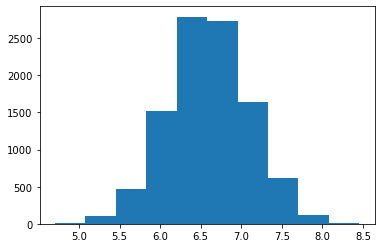

0.4975608368706083
0.5055697787190843
0.5


In [52]:
import numpy as np
import matplotlib.pyplot as plt

N = int(1e4) # number of samples of parameters

A_mu = 2.5; A_sigma = 0.4
B_mu = 4.1; B_sigma = 0.3

A = np.random.normal(A_mu, A_sigma, size=N)
B = np.random.normal(B_mu, B_sigma, size=N)

p = A + B
m = A - B

plt.hist(p)
plt.show()

print(np.std(p))
print(np.std(m))

print(np.sqrt(A_sigma**2 + B_sigma**2)) # the analytical std dev

### Multiplication



In [53]:
F_mu = 25.0; F_sigma = 1;
x_mu = 6.4; x_sigma = 0.4;

F = np.random.normal(F_mu, F_sigma, size=N)
x = np.random.normal(x_mu, x_sigma, size=N)

t = F * x
print(np.std(t))
print(np.sqrt((F_sigma / F_mu)**2 + (x_sigma / x_mu)**2) * F_mu * x_mu)

11.88841752668335
11.872657663724665


### Division



This is really like multiplication: F / x = F \* (1 / x).



In [54]:
d = F / x
print(np.std(d))
print(np.sqrt((F_sigma / F_mu)**2 + (x_sigma / x_mu)**2) * F_mu / x_mu)

0.2946373618455955
0.2898598062432779


### exponents



This rule is different than multiplication (A^2 = A\*A) because in the previous examples we assumed the errors in A and B for A\*B were uncorrelated. in A\*A, the errors are not uncorrelated, so there is a different rule for error propagation.



In [55]:
t_mu = 2.03; t_sigma = 0.01*t_mu; # 1% error
A_mu = 16.07; A_sigma = 0.06;

t = np.random.normal(t_mu, t_sigma, size=(1, N))
A = np.random.normal(A_mu, A_sigma, size=(1, N))

# Compute t^5 and sqrt(A) with error propagation
print(np.std(t**5))
print((5 * t_sigma / t_mu) * t_mu**5)

1.7082781344803122
1.7236544062149992


In [56]:
print(np.std(np.sqrt(A)))
print(1.0 / 2.0 * A_sigma / A_mu * np.sqrt(A_mu))

0.00743948580093744
0.007483647387490024


### the chain rule in error propagation



let v = v0 + a\*t, with uncertainties in vo,a and t



In [57]:
vo_mu = 1.2; vo_sigma = 0.02;
a_mu = 3.0;  a_sigma  = 0.3;
t_mu = 12.0; t_sigma  = 0.12;

vo = np.random.normal(vo_mu, vo_sigma, (1, N))
a = np.random.normal(a_mu, a_sigma, (1, N))
t = np.random.normal(t_mu, t_sigma, (1, N))

v = vo + a*t

print(np.std(v))
print(np.sqrt(vo_sigma**2 + t_mu**2 * a_sigma**2 + a_mu**2 * t_sigma**2))

3.610149993548444
3.6180105030251086


### Summary



You can numerically perform error propagation analysis if you know the underlying distribution of errors on the parameters in your equations. One benefit of the numerical propagation is you do not have to remember the error propagation rules, and you directly look at the distribution in nonlinear cases. Some limitations of this approach include

1.  You have to know the distribution of the errors in the parameters
2.  You have to assume the errors in parameters are uncorrelated.



## Another approach to error propagation



In the previous section we examined an analytical approach to error propagation, and a simulation based approach. There is another approach to error propagation, using the uncertainties module ([https://pypi.python.org/pypi/uncertainties/](https://pypi.python.org/pypi/uncertainties/)). You have to install this package, e.g. `pip install uncertainties`. After that, the module provides new classes of numbers and functions that incorporate uncertainty and propagate the uncertainty through the functions. In the examples that follow, we repeat the calculations from the previous section using the uncertainties module.

<u>Addition and subtraction</u>



In [58]:
import uncertainties as u

A = u.ufloat(2.5, 0.4)
B = u.ufloat(4.1, 0.3)
print(A + B)
print(A - B)

6.6+/-0.5
-1.6+/-0.5


<u>Multiplication and division</u>



In [59]:
F = u.ufloat(25, 1)
x = u.ufloat(6.4, 0.4)

t = F * x
print(t)

d = F / x
print(d)

160+/-12
3.91+/-0.29


<u>Exponentiation</u>



In [60]:
t = u.ufloat(2.03, 0.0203)
print(t**5)

from uncertainties.umath import sqrt
A = u.ufloat(16.07, 0.06)
print(sqrt(A))
# print np.sqrt(A) # this does not work

from uncertainties import unumpy as unp
print(unp.sqrt(A))

34.5+/-1.7
4.009+/-0.007
4.009+/-0.007


Note in the last example, we had to either import a function from uncertainties.umath or import a special version of numpy that handles uncertainty. This may be a limitation of the uncertainties package as not all functions in arbitrary modules can be covered. Note, however, that you can wrap a function to make it handle uncertainty like this.



In [61]:
import numpy as np

wrapped_sqrt = u.wrap(np.sqrt)
print(wrapped_sqrt(A))

4.009+/-0.007


<u>Propagation of errors in an integral</u>



In [62]:
import numpy as np
import uncertainties as u

x = np.array([u.ufloat(1, 0.01),
              u.ufloat(2, 0.1),
              u.ufloat(3, 0.1)])

y = 2 * x

print(np.trapz(x, y))

8.0+/-0.6


<u>Chain rule in error propagation</u>



In [63]:
v0 = u.ufloat(1.2, 0.02)
a = u.ufloat(3.0, 0.3)
t = u.ufloat(12.0, 0.12)

v = v0 + a * t
print(v)

37+/-4


<u>A real example?</u>

This is what I would setup for a real working example. I got a note from the author of the uncertainties package explaining how to do this. The idea is to create a function that returns a float, when everything is given as a float. Then, we wrap the fsolve call, and finally wrap the wrapped fsolve call!

-   Step 1. Write the function to solve with arguments for all unitted quantities. This function may be called with uncertainties, or with floats.

-   Step 2. Wrap the call to fsolve in a function that takes all the parameters as arguments, and that returns the solution.

-   Step 3. Use uncertainties.wrap to wrap the function in Step 2 to get the answer with uncertainties.

Here is the code that does work:



In [64]:
import uncertainties as u
from scipy.optimize import fsolve

Fa0 = u.ufloat(5.0, 0.05)
v0 = u.ufloat(10., 0.1)

V = u.ufloat(66000.0, 100.0)  # reactor volume L^3
k = u.ufloat(3.0, 0.2)      # rate constant L/mol/h

# Step 1
def func(Ca, v0, k, Fa0, V):
    "Mole balance for a CSTR. Solve this equation for func(Ca)=0"
    Fa = v0 * Ca     # exit molar flow of A
    ra = -k * Ca**2  # rate of reaction of A L/mol/h
    return Fa0 - Fa + V * ra

# Step 2
def Ca_solve(v0, k, Fa0, V):
    'wrap fsolve to pass parameters as float or units'
    # this line is a little fragile. You must put [0] at the end or
    # you get the NotImplemented result
    guess = 0.1 * Fa0 / v0
    sol = fsolve(func, guess, args=(v0, k, Fa0, V))[0]
    return sol

# Step 3
print(u.wrap(Ca_solve)(v0, k, Fa0, V))

0.00500+/-0.00017


It would take some practice to get used to this, but the payoff is that you have an "automatic" error propagation method.

Being ever the skeptic, let us compare the result above to the Monte Carlo approach to error estimation below.



In [65]:
import numpy as np
from scipy.optimize import fsolve

N = 10000
Fa0 = np.random.normal(5, 0.05, (1, N))
v0 = np.random.normal(10.0, 0.1, (1, N))
V =  np.random.normal(66000, 100, (1,N))
k = np.random.normal(3.0, 0.2, (1, N))

SOL = np.zeros((1, N))

for i in range(N):
    def func(Ca):
        return Fa0[0,i] - v0[0,i] * Ca + V[0,i] * (-k[0,i] * Ca**2)
    SOL[0,i] = fsolve(func, 0.1 * Fa0[0,i] / v0[0,i])[0]

print('Ca(exit) = {0}+/-{1}'.format(np.mean(SOL), np.std(SOL)))

Ca(exit) = 0.0050106655323030325+/-0.00016959459913932142


I am pretty content those are the same!



### Summary



The uncertainties module is pretty amazing. It automatically propagates errors through a pretty broad range of computations. It is a little tricky for third-party packages, but it seems doable.

Read more about the package at [http://pythonhosted.org/uncertainties/index.html](http://pythonhosted.org/uncertainties/index.html).



## Random thoughts



[Matlab post](http://matlab.cheme.cmu.edu/2011/09/04/random-thoughts/)

Random numbers are used in a variety of simulation methods, most notably Monte Carlo simulations. In another later example, we will see how we can use random numbers for error propagation analysis. First, we discuss two types of pseudorandom numbers we can use in python: uniformly distributed and normally distributed numbers.

Say you are the gambling type, and bet your friend $5 the next random number will be greater than 0.49. Let us ask Python to roll the random number generator for us.



In [66]:
import numpy as np

n = np.random.uniform()
print('n = {0}'.format(n))

if n > 0.49:
    print('You win!')
else:
    print('you lose.')

n = 0.7360798713804261
You win!


The odds of you winning the last bet are slightly stacked in your favor. There is only a 49% chance your friend wins, but a 51% chance that you win. Lets play the game a lot of times times and see how many times you win, and your friend wins. First, lets generate a bunch of numbers and look at the distribution with a histogram.



You won 5064 times (50.640000%)


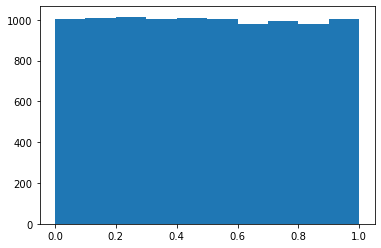

In [67]:
import numpy as np

N = 10000
games = np.random.uniform(size=N)

wins = np.sum(games > 0.49)
losses = N - wins

print('You won {0} times ({1:%})'.format(wins, float(wins) / N))

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(games);

As you can see you win slightly more than you lost.

It is possible to get random integers. Here are a few examples of getting a random integer between 1 and 100. You might do this to get random indices of a list, for example.



In [68]:
import numpy as np

print(np.random.randint(1, 100))
print(np.random.randint(1, 100, 3))
print(np.random.randint(1, 100, (2, 2)))

20
[35 99  4]
[[35 78]
 [42 20]]


The normal distribution is defined by $f(x)=\frac{1}{\sqrt{2\pi \sigma^2}} \exp (-\frac{(x-\mu)^2}{2\sigma^2})$ where $\mu$ is the mean value, and $\sigma$ is the standard deviation. In the standard distribution, $\mu=0$ and $\sigma=1$.



In [69]:
import numpy as np

mu = 1
sigma = 0.5
print(np.random.normal(mu, sigma))
print(np.random.normal(mu, sigma, 2))

1.3861173043482717
[1.26817308 1.02663403]


Let us compare the sampled distribution to the analytical distribution. We generate a large set of samples, and calculate the probability of getting each value using the matplotlib.pyplot.hist command.



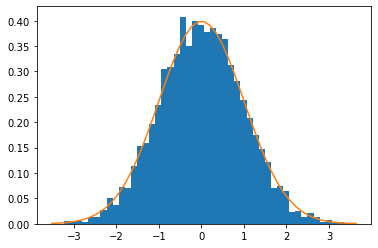

In [70]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0; sigma = 1

N = 5000
samples = np.random.normal(mu, sigma, N)

counts, bins, ignored = plt.hist(samples, 50, density=True)

plt.plot(bins, 1.0/np.sqrt(2 * np.pi * sigma**2)*np.exp(-((bins - mu)**2)/(2*sigma**2)));

What fraction of points lie between plus and minus one standard deviation of the mean?

samples >= mu-sigma will return a vector of ones where the inequality is true, and zeros where it is not. (samples >= mu-sigma) & (samples <= mu+sigma) will return a vector of ones where there is a one in both vectors, and a zero where there is not. In other words, a vector where both inequalities are true. Finally, we can sum the vector to get the number of elements where the two inequalities are true, and finally normalize by the total number of samples to get the fraction of samples that are greater than -sigma and less than sigma.



In [71]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0; sigma = 1

N = 5000
samples = np.random.normal(mu, sigma, N)

a = np.sum((samples >= (mu - sigma)) & (samples <= (mu + sigma))) / float(N)
b = np.sum((samples >= (mu - 2*sigma)) & (samples <= (mu + 2*sigma))) / float(N)
print('{0:%} of samples are within +- 1 standard deviations of the mean'.format(a))
print('{0:%} of samples are within +- 2 standard deviations of the mean'.format(b))

68.940000% of samples are within +- 1 standard deviations of the mean
95.580000% of samples are within +- 2 standard deviations of the mean


### Summary



We only considered the numpy.random functions here, and not all of them. There are many distributions of random numbers to choose from. There are also random numbers in the python random module. Remember these are only [pseudorandom](http://en.wikipedia.org/wiki/Pseudorandom_number_generator) numbers, but they are still useful for many applications.

